# Correlations between soil colour and geochemical properties and SSA

and SOM

Alex Koiter

## Load Libraries

In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor

Loading required package: viridisLite

Attaching package: 'viridis'

The following object is masked from 'package:scales':

    viridis_pal

## Load data

In [ ]:
psa <- read.csv(here::here("./notebooks/PSA_data.csv")) %>%
  rename(site = Site) %>%
  select(site, sample_number, sampling_design, dx_50, specific_surface_area) %>%
  filter(sampling_design != "Fine scale")  

om <- read.csv(here::here("./notebooks/OM_data.csv")) %>%
  rename(site = Site, sampling_design = Sampling_Design, sample_number = Sample_Number) %>%
  select(OM, site, sampling_design, sample_number) %>%
  filter(sampling_design != "Fine scale") %>%
  mutate(site = recode(site, Agricultural = "Agriculture")) 

geo <- read.csv(here::here("./notebooks/Geochemistry analysis - Copy 2.csv")) %>%
  select(-X) %>%
  rename(sampling_design = sample_design) %>%
  filter(sampling_design != "Fine scale") %>%
  pivot_longer(cols = Ag:Zr, names_to = "Element", values_to = "value") %>%
  filter(Element %in% c("Ag", "Al", "As","B","Ba","Be","Bi","Ca","Cd","Ce","Co", "Cr", "Cs", "Cu", "Fe", "Ga", "Hf", "Hg", "In", "K", "La", "Li", "Mg", "Mn", "Mo", "Nb", "Ni", "P", "Pb", "Rb", "S", "Sb", "Sc", "Se", "Sn", "Sr", "Te", "Th", "Tl", "U", "V", "Y", "Zn", "Zr")) %>%
  pivot_wider(names_from = Element, values_from = value)

colour <- read.csv(here::here("./notebooks/final results revised.csv")) %>%
  select(-X.1) %>%
  rename(sampling_design = sample_design) %>%
  filter(sampling_design != "Fine scale") 


## Colour correlations

In [ ]:
corr_colour <- colour %>%
  left_join(psa) %>%
  left_join(om) %>%
  pivot_longer(cols = X:B, names_to = "Fingerprint", values_to = "value") %>%
  nest(data = c(-Fingerprint, -sampling_design, -site)) %>%
  mutate(ssa_test = map(data, ~cor.test(.$value, .$specific_surface_area, method = "pearson"))) %>%
  mutate(p_value_ssa = map_dbl(ssa_test, ~ .$p.value),
         estimate_ssa =  map_dbl(ssa_test, ~ .$estimate)) %>%
  mutate(d50_test = map(data, ~cor.test(.$value, .$specific_surface_area, method = "pearson"))) %>%
  mutate(p_value_d50 = map_dbl(d50_test, ~ .$p.value),
         estimate_d50 =  map_dbl(d50_test, ~ .$estimate)) %>%
  mutate(om_test = map(data, ~cor.test(.$value, .$OM, method = "pearson"))) %>%
  mutate(p_value_om = map_dbl(om_test, ~ .$p.value),
         estimate_om =  map_dbl(om_test, ~ .$estimate)) %>%
  select(-data, -ssa_test, -d50_test, -om_test) %>%
  mutate(type = "Colour")


Joining with `by = join_by(sample_number, site, sampling_design)`
Joining with `by = join_by(sample_number, site, sampling_design)`

# A tibble: 90 × 10
   site        sampling_design Fingerprint p_value_ssa estimate_ssa p_value_d50
   <chr>       <chr>           <chr>             <dbl>        <dbl>       <dbl>
 1 Agriculture Grid            X             0.0607          -0.270   0.0607   
 2 Agriculture Grid            Y             0.0742          -0.257   0.0742   
 3 Agriculture Grid            Z             0.254           -0.166   0.254    
 4 Agriculture Grid            x             0.000763        -0.465   0.000763 
 5 Agriculture Grid            y             0.000434        -0.483   0.000434 
 6 Agriculture Grid            u             0.0000132       -0.579   0.0000132
 7 Agriculture Grid            v             0.0000697       -0.537   0.0000697
 8 Agriculture Grid            L             0.0892          -0.245   0.0892   
 9 Agriculture Grid            a             0.0000322       -0.557   0.0000322
10 Agriculture Grid            b             0.0000392       -0.552   0.0000392
# ℹ 80 more rows
# ℹ

Joining with `by = join_by(sample_number, site, sampling_design)`
Joining with `by = join_by(sample_number, site, sampling_design)`

# A tibble: 45 × 10
   sampling_design Fingerprint p_value_ssa estimate_ssa p_value_d50 estimate_d50
   <chr>           <chr>             <dbl>        <dbl>       <dbl>        <dbl>
 1 Grid            X              4.74e- 2        0.200    4.74e- 2        0.200
 2 Grid            Y              1.28e- 2        0.249    1.28e- 2        0.249
 3 Grid            Z              1.59e- 7        0.498    1.59e- 7        0.498
 4 Grid            x              4.60e-47       -0.940    4.60e-47       -0.940
 5 Grid            y              9.31e- 2       -0.170    9.31e- 2       -0.170
 6 Grid            u              1.41e-41       -0.921    1.41e-41       -0.921
 7 Grid            v              1.97e-12       -0.633    1.97e-12       -0.633
 8 Grid            L              4.25e- 3        0.285    4.25e- 3        0.285
 9 Grid            a              5.58e-49       -0.945    5.58e-49       -0.945
10 Grid            b              1.28e-25       -0.824    1.28e-25       -0.824
# ℹ 35 m

## Geochem correlations

In [ ]:
corr_geo <- geo %>%
  left_join(psa) %>%
  left_join(om) %>%
  pivot_longer(cols = Ag:Zr, names_to = "Fingerprint", values_to = "value") %>%
  nest(data = c(-Fingerprint, -sampling_design, -site)) %>%
  mutate(ssa_test = map(data, ~cor.test(.$value, .$specific_surface_area, method = "pearson"))) %>%
  mutate(p_value_ssa = map_dbl(ssa_test, ~ .$p.value),
         estimate_ssa =  map_dbl(ssa_test, ~ .$estimate)) %>%
  mutate(d50_test = map(data, ~cor.test(.$value, .$specific_surface_area, method = "pearson"))) %>%
  mutate(p_value_d50 = map_dbl(d50_test, ~ .$p.value),
         estimate_d50 =  map_dbl(d50_test, ~ .$estimate)) %>%
  mutate(om_test = map(data, ~cor.test(.$value, .$OM, method = "pearson"))) %>%
  mutate(p_value_om = map_dbl(om_test, ~ .$p.value),
         estimate_om =  map_dbl(om_test, ~ .$estimate)) %>%
  select(-data, -ssa_test, -d50_test, -om_test) %>%
  mutate(type = "Geochemistry")


Joining with `by = join_by(sample_number, site, sampling_design)`
Joining with `by = join_by(sample_number, site, sampling_design)`

The first warning was:
ℹ In argument: `ssa_test = map(data, ~cor.test(.$value,
  .$specific_surface_area, method = "pearson"))`.
Caused by warning in `cor()`:
! the standard deviation is zero
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.

The first warning was:
ℹ In argument: `d50_test = map(data, ~cor.test(.$value,
  .$specific_surface_area, method = "pearson"))`.
Caused by warning in `cor()`:
! the standard deviation is zero
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.

The first warning was:
ℹ In argument: `om_test = map(data, ~cor.test(.$value, .$OM, method =
  "pearson"))`.
Caused by warning in `cor()`:
! the standard deviation is zero
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.

# A tibble: 264 × 10
   site   sampling_design Fingerprint p_value_ssa estimate_ssa p_value_d50
   <chr>  <chr>           <chr>             <dbl>        <dbl>       <dbl>
 1 Forest Grid            Ag             2.89e- 5        0.555    2.89e- 5
 2 Forest Grid            Al             5.39e-14        0.834    5.39e-14
 3 Forest Grid            As             9.84e- 7       -0.629    9.84e- 7
 4 Forest Grid            B              2.15e- 3        0.424    2.15e- 3
 5 Forest Grid            Ba             4.69e- 3       -0.394    4.69e- 3
 6 Forest Grid            Be             1.11e- 7        0.669    1.11e- 7
 7 Forest Grid            Bi             5.61e- 9        0.715    5.61e- 9
 8 Forest Grid            Ca             3.95e-11       -0.775    3.95e-11
 9 Forest Grid            Cd             2.20e- 1        0.177    2.20e- 1
10 Forest Grid            Ce             2.95e- 7       -0.652    2.95e- 7
# ℹ 254 more rows
# ℹ 4 more variables: estimate_d50 <dbl>, p_value_om <dbl>, e

Joining with `by = join_by(sample_number, site, sampling_design)`
Joining with `by = join_by(sample_number, site, sampling_design)`

# A tibble: 132 × 10
   sampling_design Fingerprint p_value_ssa estimate_ssa p_value_d50 estimate_d50
   <chr>           <chr>             <dbl>        <dbl>       <dbl>        <dbl>
 1 Grid            Ag             4.80e-15        0.686    4.80e-15        0.686
 2 Grid            Al             1.34e-49        0.947    1.34e-49        0.947
 3 Grid            As             1.19e-19        0.757    1.19e-19        0.757
 4 Grid            B              4.46e-35        0.891    4.46e-35        0.891
 5 Grid            Ba             1.10e- 2       -0.255    1.10e- 2       -0.255
 6 Grid            Be             1.78e-51        0.952    1.78e-51        0.952
 7 Grid            Bi             8.99e-21        0.772    8.99e-21        0.772
 8 Grid            Ca             1.03e- 6        0.468    1.03e- 6        0.468
 9 Grid            Cd             2.78e- 2        0.221    2.78e- 2        0.221
10 Grid            Ce             5.25e- 5        0.395    5.25e- 5        0.395
# ℹ 122

## Geochemistry plotting

In [ ]:
plot_geo <- corr_geo %>%
  bind_rows(corr_geo2) %>%
  mutate(site = fct_relevel(site, c("Agriculture", "Forest", "Combined"))) 

plot_geo %>%
  filter(p_value_ssa < 0.05) %>%
  group_by(site) %>%
  summarise(n = n())


# A tibble: 3 × 2
  site            n
  <fct>       <int>
1 Agriculture    32
2 Forest         75
3 Combined      105

`summarise()` has grouped output by 'site'. You can override using the
`.groups` argument.

# A tibble: 9 × 3
# Groups:   site [3]
  site        sampling_design     n
  <fct>       <chr>           <int>
1 Agriculture Grid               22
2 Agriculture Likely to erode     7
3 Agriculture Transect            3
4 Forest      Grid               37
5 Forest      Likely to erode     6
6 Forest      Transect           32
7 Combined    Grid               37
8 Combined    Likely to erode    36
9 Combined    Transect           32

Joining with `by = join_by(sample_number, site, sampling_design)`
Joining with `by = join_by(sample_number, site, sampling_design)`

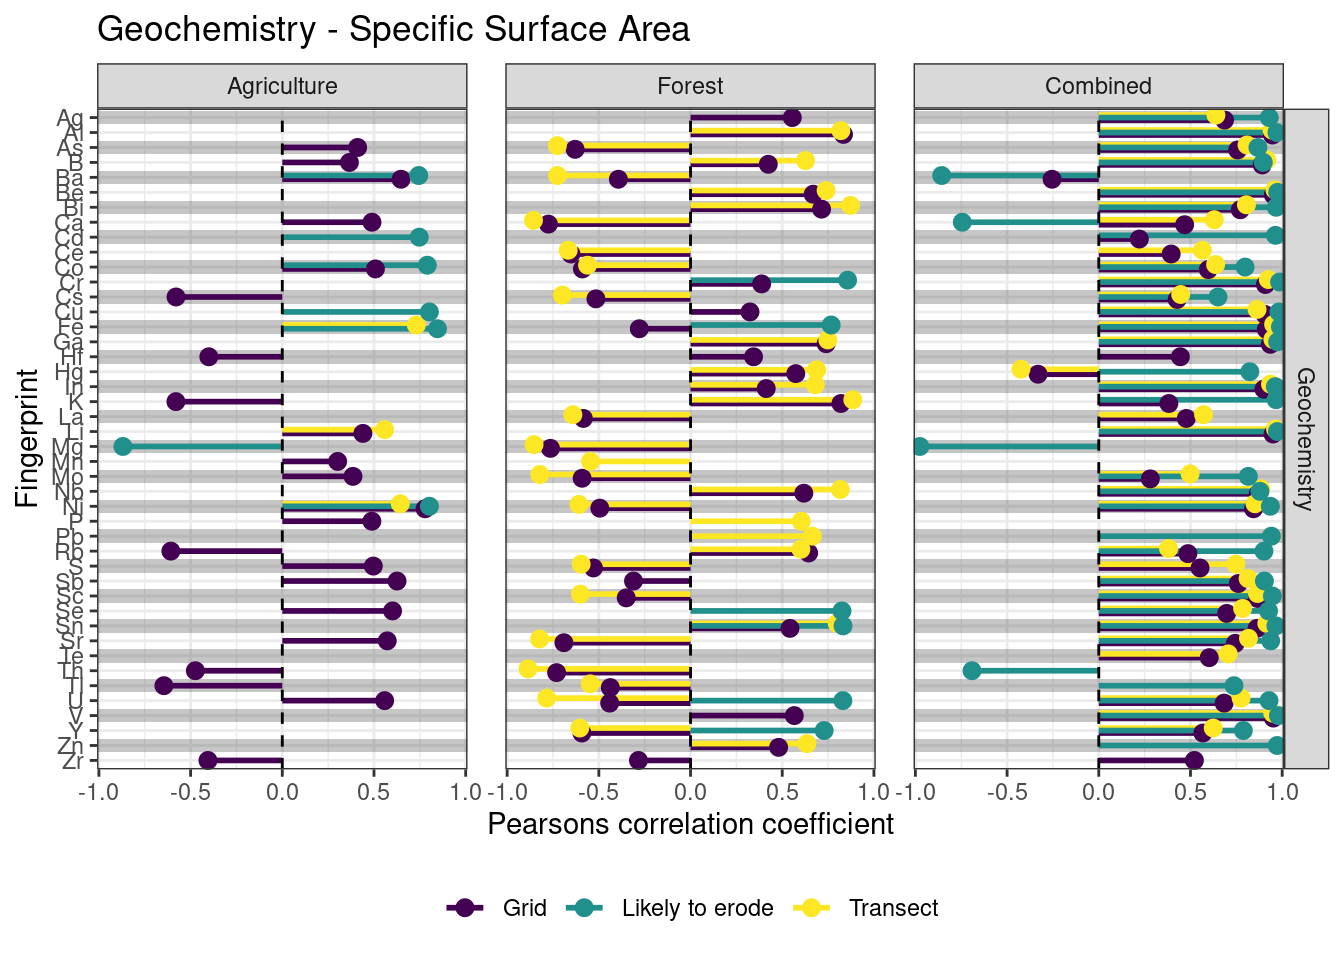

In [ ]:
supfig3 <- ggplot() +
  theme_bw() +
  geom_bar(data = trial, aes(y = fct_relevel(Fingerprint, rev), x = bar), fill ="grey20", position="identity", stat = "identity", alpha = 0.1) +
  geom_bar(data = trial2, aes(y = fct_relevel(Fingerprint, rev), x = bar), fill ="grey20", position="identity", stat = "identity", alpha = 0.1) +
  geom_pointrange(data = filter(plot_geo, type == "Geochemistry", p_value_ssa < 0.05), aes(y = fct_relevel(Fingerprint, rev), x = estimate_ssa, colour = sampling_design, xmax= estimate_ssa, xmin = 0), position = position_dodge(width = 0.5), linewidth = 1) +
  geom_vline(xintercept = 0, linetype = "dashed") +
  theme_bw() +
  scale_x_continuous(expand = c(0,0.01), limits = c(-1, 1)) +
  scale_colour_viridis_d() +
  theme(legend.position = "bottom",
        legend.title = element_blank(),
        panel.spacing.x = unit(5, "mm")) +
  labs(title = "Geochemistry - Specific Surface Area", y = "Fingerprint", x = "Pearsons correlation coefficient") +
  facet_grid(type~site)
supfig3


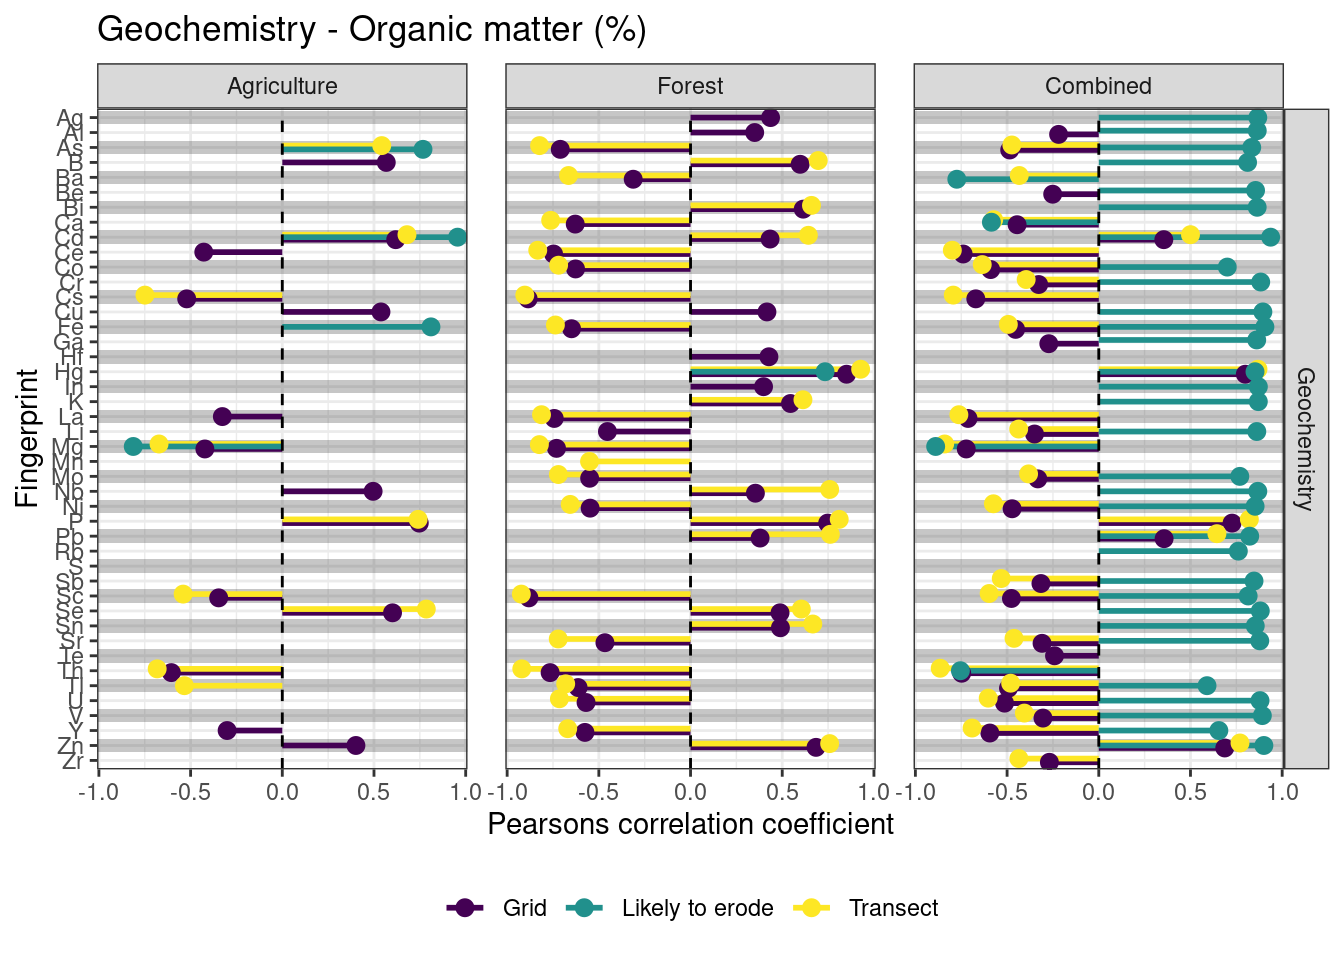

In [ ]:
supfig4 <- ggplot() +
  theme_bw() +
  geom_bar(data = trial, aes(y = fct_relevel(Fingerprint, rev), x = bar), fill ="grey20", position="identity", stat = "identity", alpha = 0.1) +
  geom_bar(data = trial2, aes(y = fct_relevel(Fingerprint, rev), x = bar), fill ="grey20", position="identity", stat = "identity", alpha = 0.1) +
  geom_pointrange(data = filter(plot_geo, type == "Geochemistry", p_value_om < 0.05), aes(y = fct_relevel(Fingerprint, rev), x = estimate_om , colour = sampling_design, xmax= estimate_om, xmin = 0), position = position_dodge(width = 0.5), linewidth = 1) +
  geom_vline(xintercept = 0, linetype = "dashed") +
  theme_bw() +
  scale_x_continuous(expand = c(0,0.01), limits = c(-1, 1)) +
  scale_colour_viridis_d() +
  theme(legend.position = "bottom",
        legend.title = element_blank(),
        panel.spacing.x = unit(5, "mm")) +
  labs(title = "Geochemistry - Organic matter (%)", y = "Fingerprint", x = "Pearsons correlation coefficient") +
  facet_grid(type~site)
supfig4


### geochem examples

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

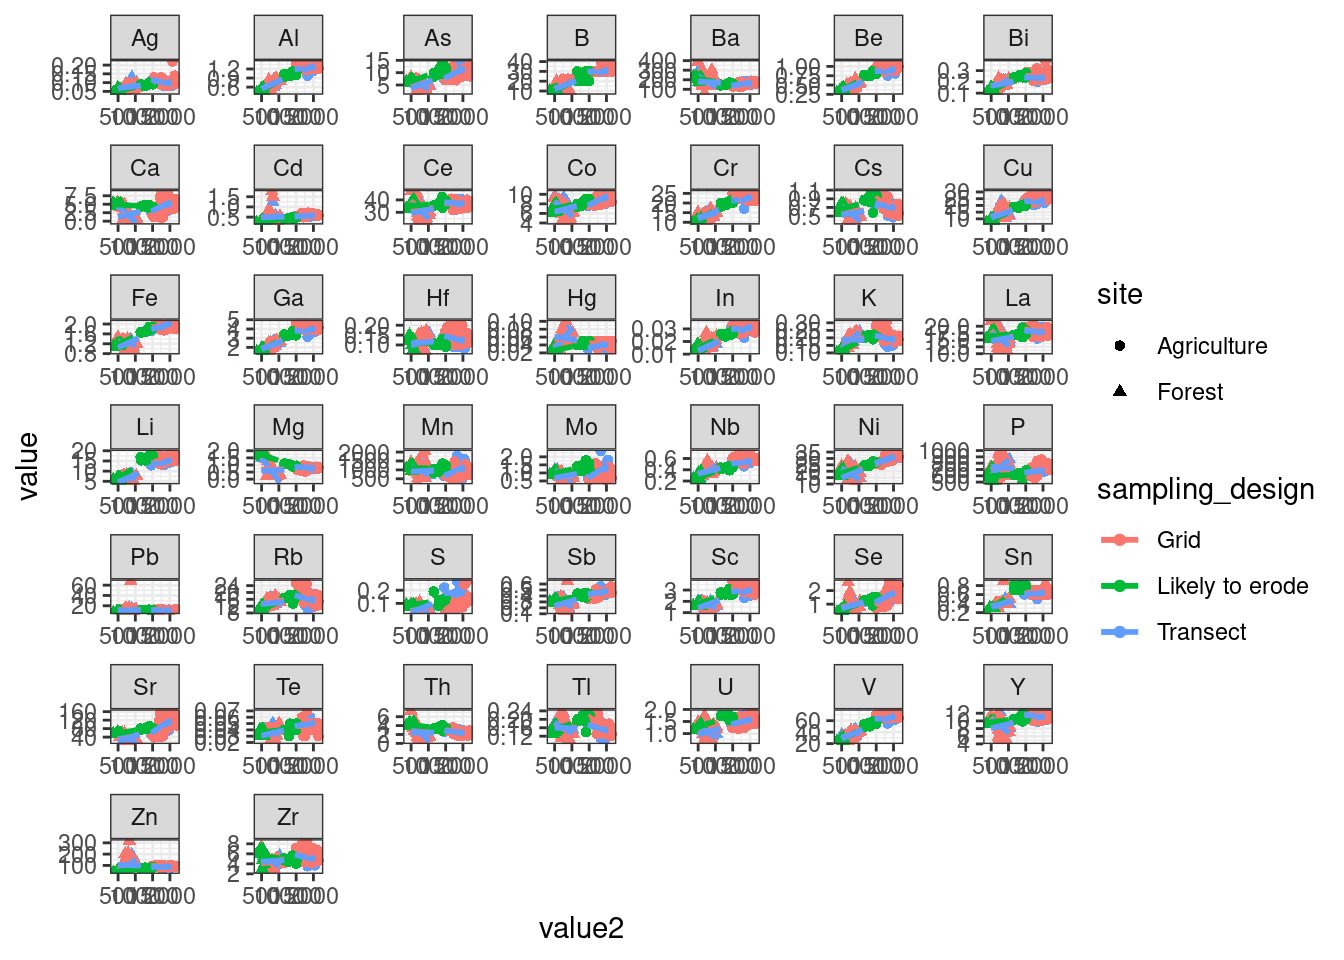

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

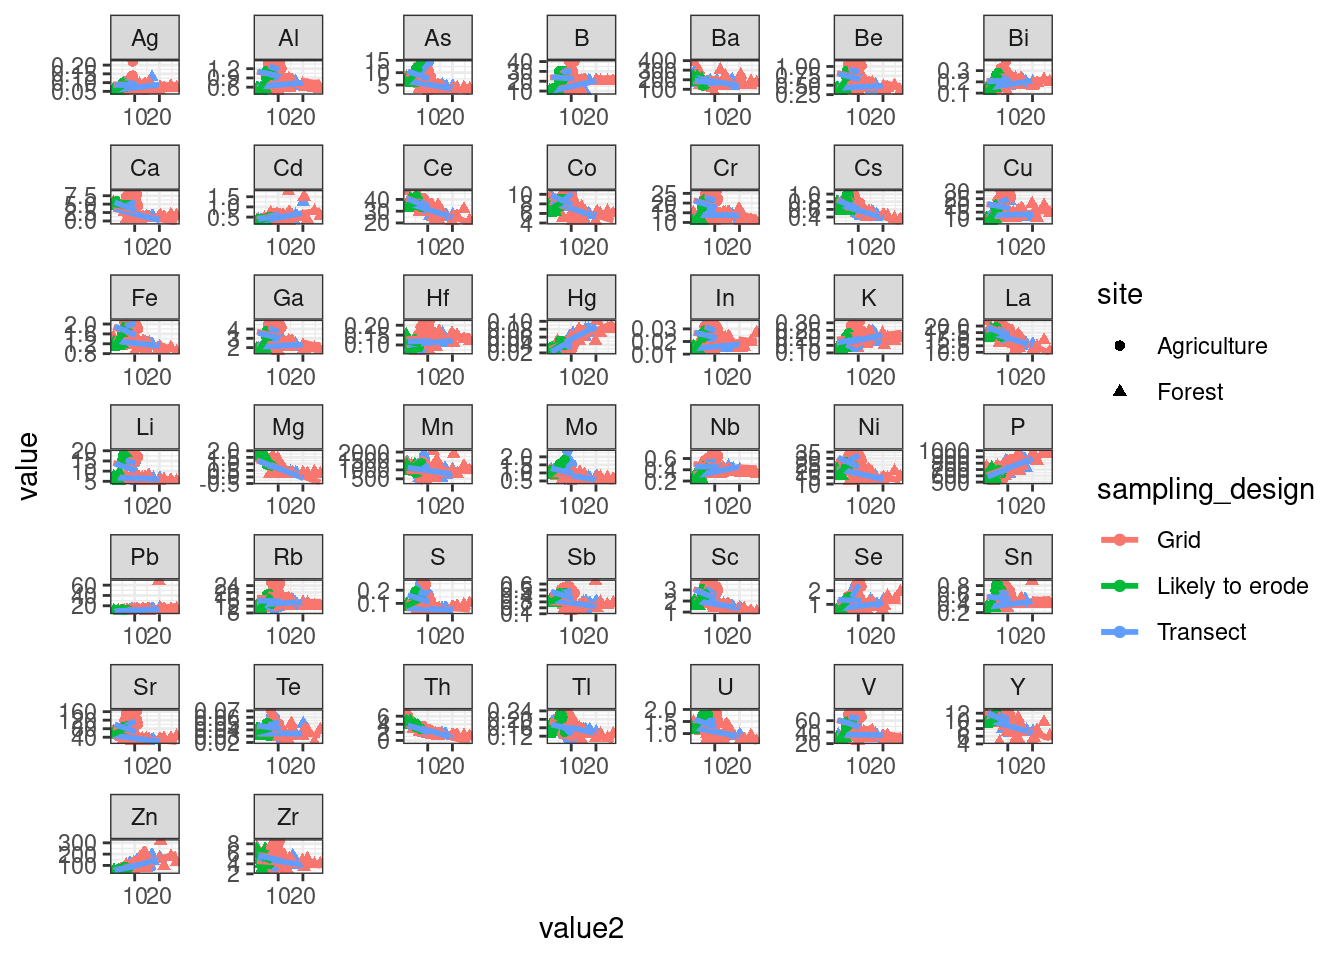

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

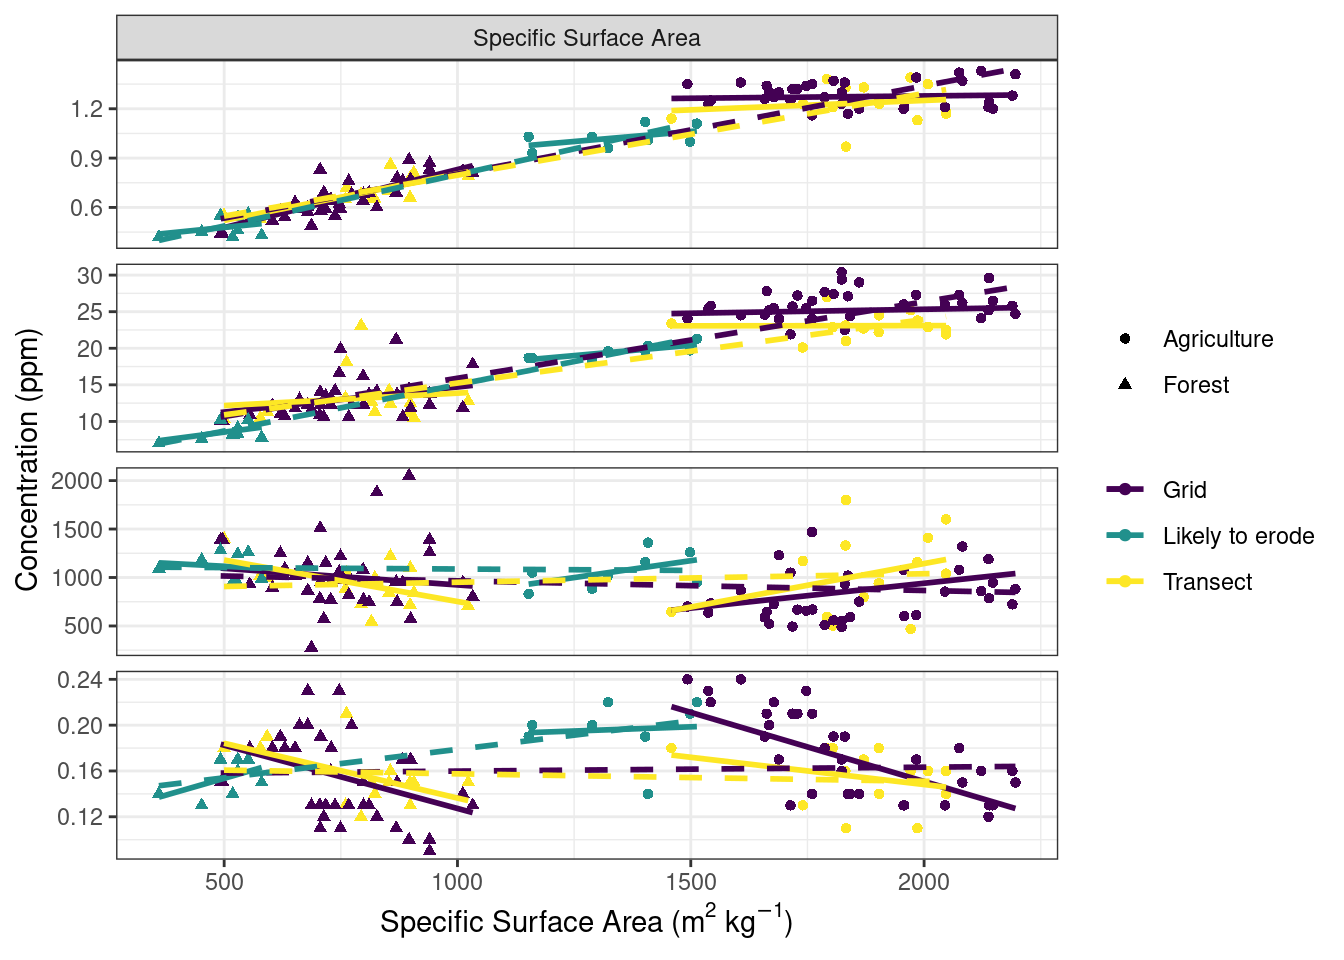

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

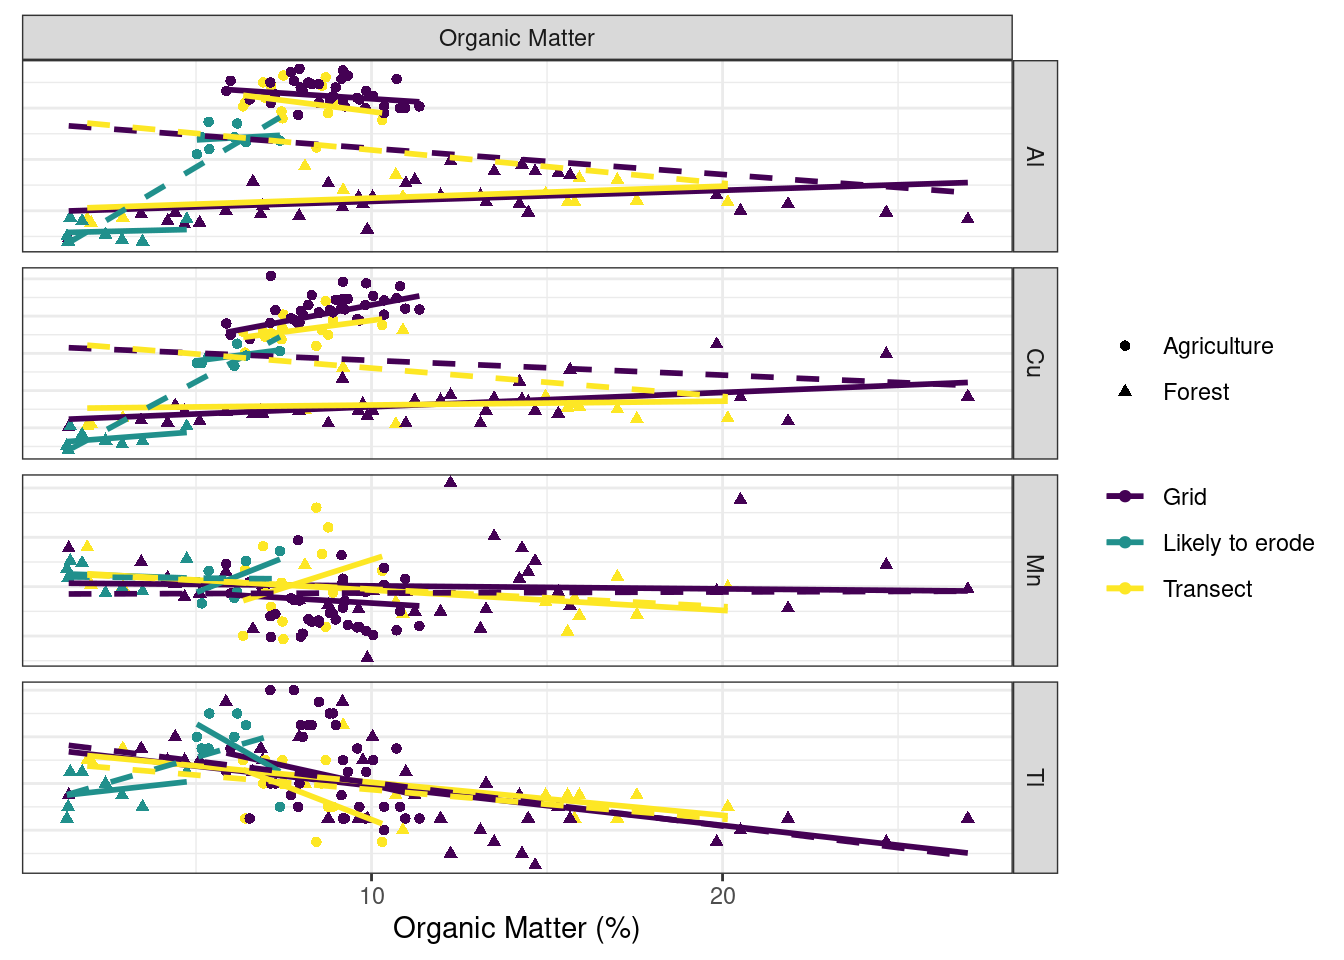

In [ ]:
example_fingerprint <- c("Al", "Cu", "Mn", "Tl")

ggplot(data = filter(plot_geo_2, property == "specific_surface_area"), aes(x = value2, y = value, colour = sampling_design, shape = site)) +
  geom_point() +
  theme_bw() +
  stat_smooth(method = "lm", se = F) + 
  stat_smooth(aes(colour = sampling_design, shape = NULL), method = "lm", se = F, linetype="dashed") +
  facet_wrap(~Fingerprint, scales = "free")


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

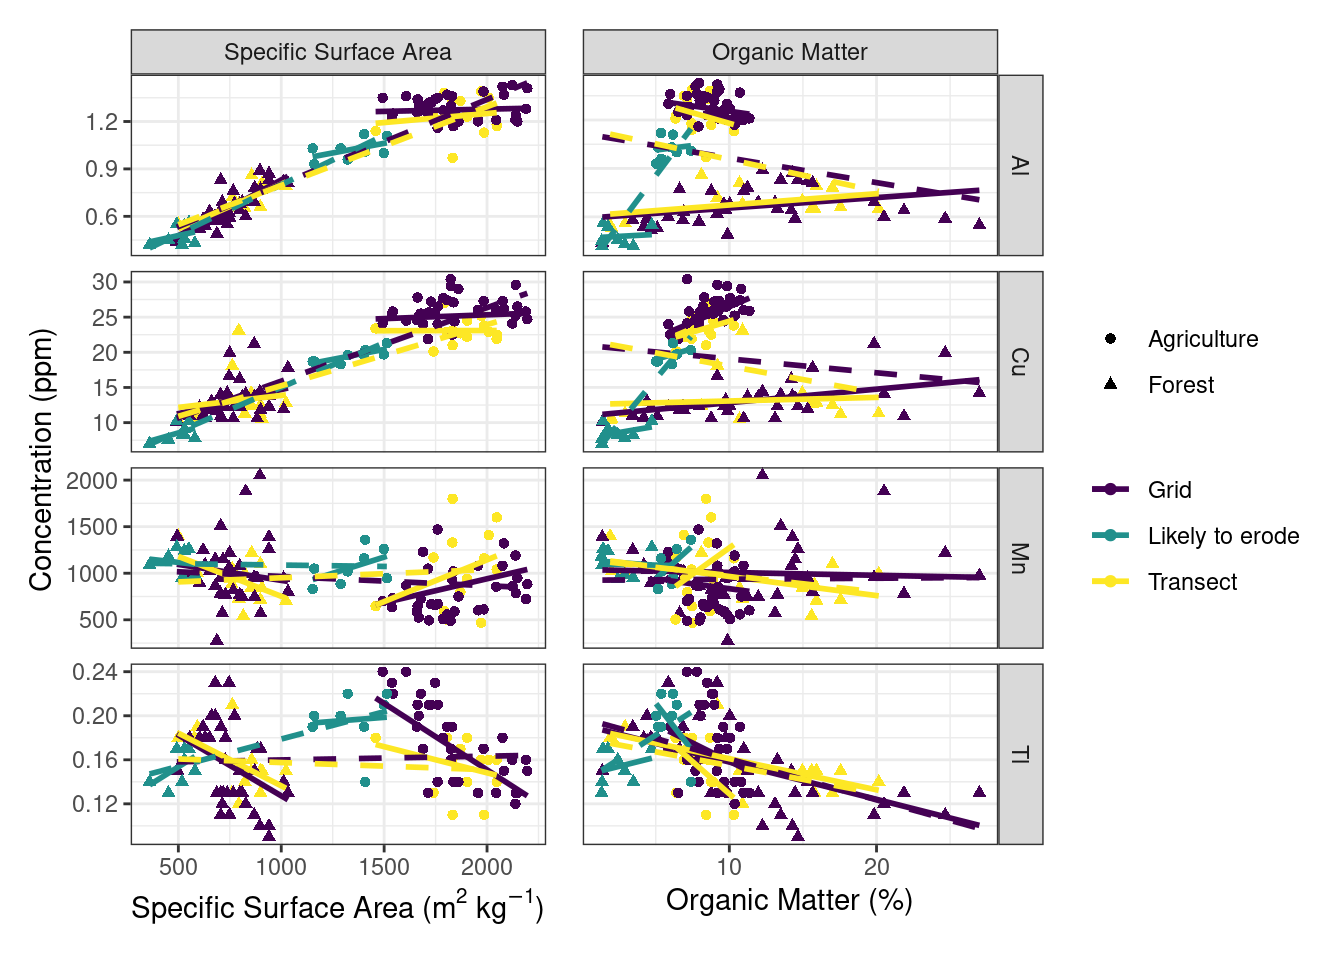

In [ ]:
p3 <- p_ssa + p_om +
  plot_layout(guides = 'collect')
p3


### Colour plotting

In [ ]:
plot_colour <- corr_colour %>%
  bind_rows(corr_colour2) %>%
  mutate(site = fct_relevel(site, c("Agriculture", "Forest", "Combined"))) %>%
  mutate(Fingerprint = fct_relevel(Fingerprint,
      c("R", "G", "B", "x", "y", "Y", "X", "Z", "L", "a", "b", "u", "v", "c", "h"))) %>%
  mutate(Fingerprint = fct_recode(Fingerprint, 
    "italic(`a*`)" = "a", "italic(`b*`)" = "b", "italic(`c*`)" = "c", "italic(`h*`)" = "h", 
    "italic(`u*`)" = "u",  "italic(`v*`)" = "v"))

plot_colour %>%
  filter(p_value_om < 0.05) %>%
  group_by(site) %>%
  summarise(n = n())


# A tibble: 3 × 2
  site            n
  <fct>       <int>
1 Agriculture    30
2 Forest         27
3 Combined       37

`summarise()` has grouped output by 'site'. You can override using the
`.groups` argument.

# A tibble: 8 × 3
# Groups:   site [3]
  site        sampling_design     n
  <fct>       <chr>           <int>
1 Agriculture Grid               14
2 Agriculture Likely to erode     7
3 Agriculture Transect            9
4 Forest      Grid               14
5 Forest      Transect           13
6 Combined    Grid               13
7 Combined    Likely to erode    13
8 Combined    Transect           11

Joining with `by = join_by(sample_number, site, sampling_design)`
Joining with `by = join_by(sample_number, site, sampling_design)`

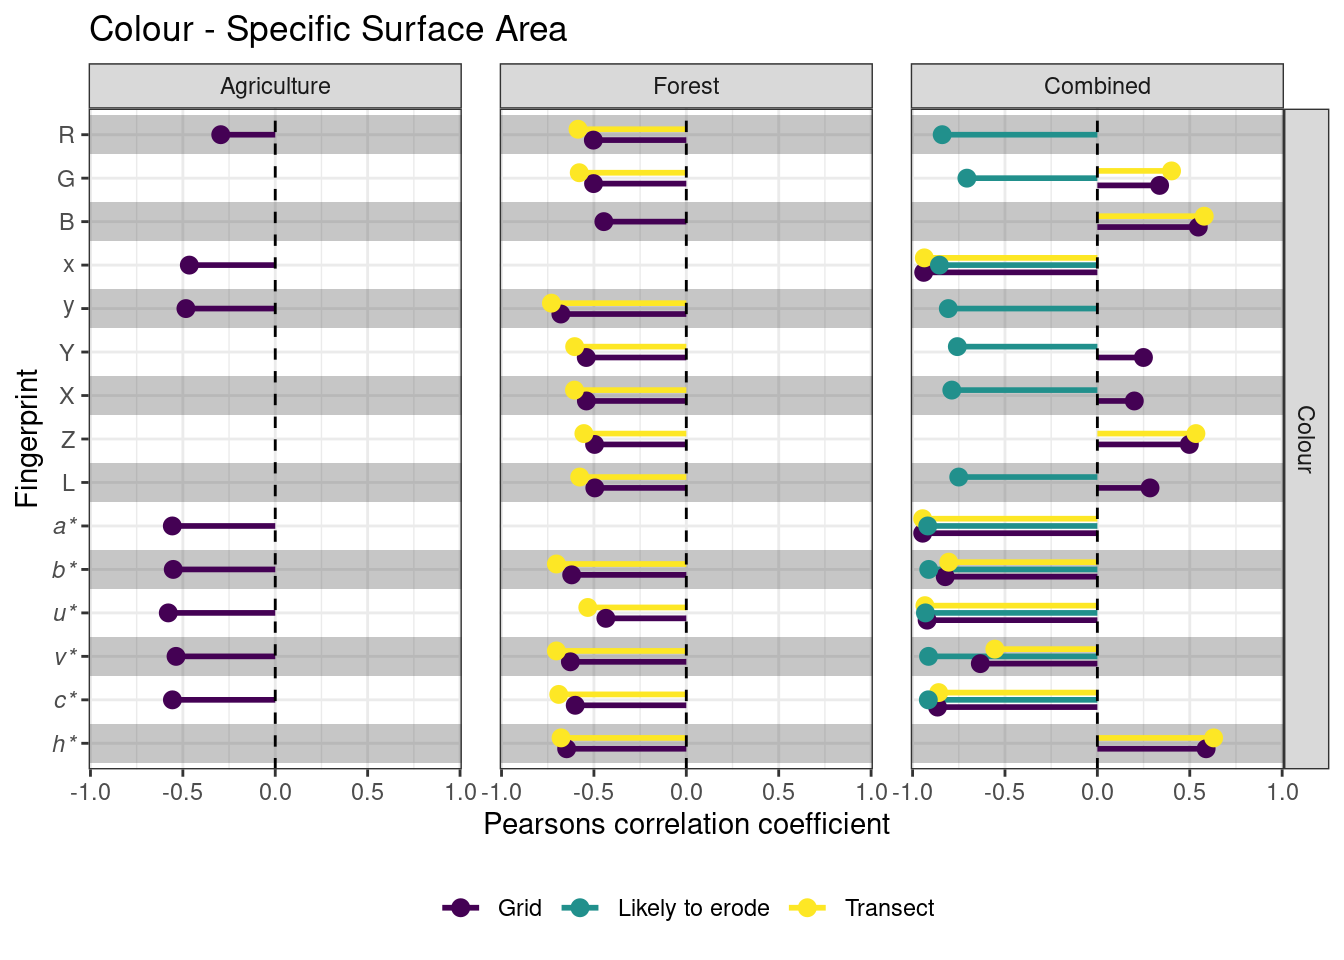

In [ ]:
supfig1 <- ggplot() +
  theme_bw() +
  geom_bar(data = trial3, aes(y = fct_relevel(Fingerprint, rev), x = bar), fill ="grey20", position="identity", stat = "identity", alpha = 0.1) +
  geom_bar(data = trial4, aes(y = fct_relevel(Fingerprint, rev), x = bar), fill ="grey20", position="identity", stat = "identity", alpha = 0.1) +
  geom_pointrange(data = filter(plot_colour, type == "Colour", p_value_ssa < 0.05), aes(y = fct_relevel(Fingerprint, rev), x = estimate_ssa, colour = sampling_design, xmax= estimate_ssa, xmin = 0), position = position_dodge(width = 0.5), linewidth = 1) +
  geom_vline(xintercept = 0, linetype = "dashed") +
  theme_bw() +
  scale_x_continuous(expand = c(0,0.01), limits = c(-1, 1)) +
  scale_y_discrete(labels = label_parse()) +
  scale_colour_viridis_d() +
  theme(legend.position = "bottom",
        legend.title = element_blank(),
        panel.spacing.x = unit(5, "mm")) +
  labs(title = "Colour - Specific Surface Area", y = "Fingerprint", x = "Pearsons correlation coefficient") +
  facet_grid(type~site)
supfig1


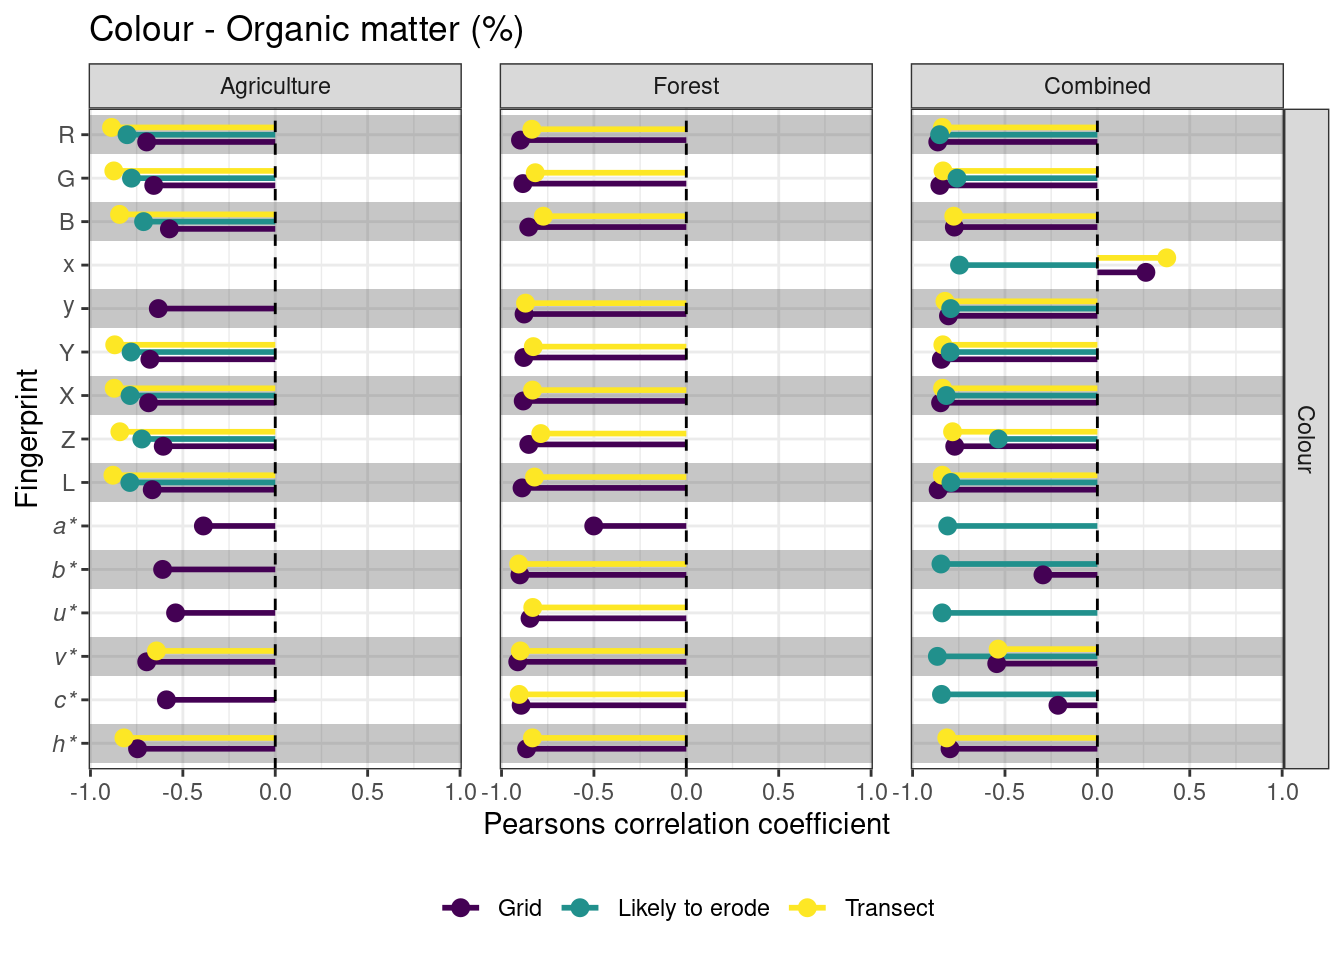

In [ ]:
supfig2 <- ggplot() +
  theme_bw() +
  geom_bar(data = trial3, aes(y = fct_relevel(Fingerprint, rev), x = bar), fill ="grey20", position="identity", stat = "identity", alpha = 0.1) +
  geom_bar(data = trial4, aes(y = fct_relevel(Fingerprint, rev), x = bar), fill ="grey20", position="identity", stat = "identity", alpha = 0.1) +
  geom_pointrange(data = filter(plot_colour, type == "Colour", p_value_om < 0.05), aes(y = fct_relevel(Fingerprint, rev), x = estimate_om , colour = sampling_design, xmax= estimate_om, xmin = 0), position = position_dodge(width = 0.5), linewidth = 1) +
  geom_vline(xintercept = 0, linetype = "dashed") +
  theme_bw() +
  scale_x_continuous(expand = c(0,0.01), limits = c(-1, 1)) +
  scale_y_discrete(labels = label_parse()) +
  scale_colour_viridis_d() +
  theme(legend.position = "bottom",
        legend.title = element_blank(),
        panel.spacing.x = unit(5, "mm")) +
  labs(title = "Colour - Organic matter (%)", y = "Fingerprint", x = "Pearsons correlation coefficient") +
  facet_grid(type~site)
supfig2


### Colour examples

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

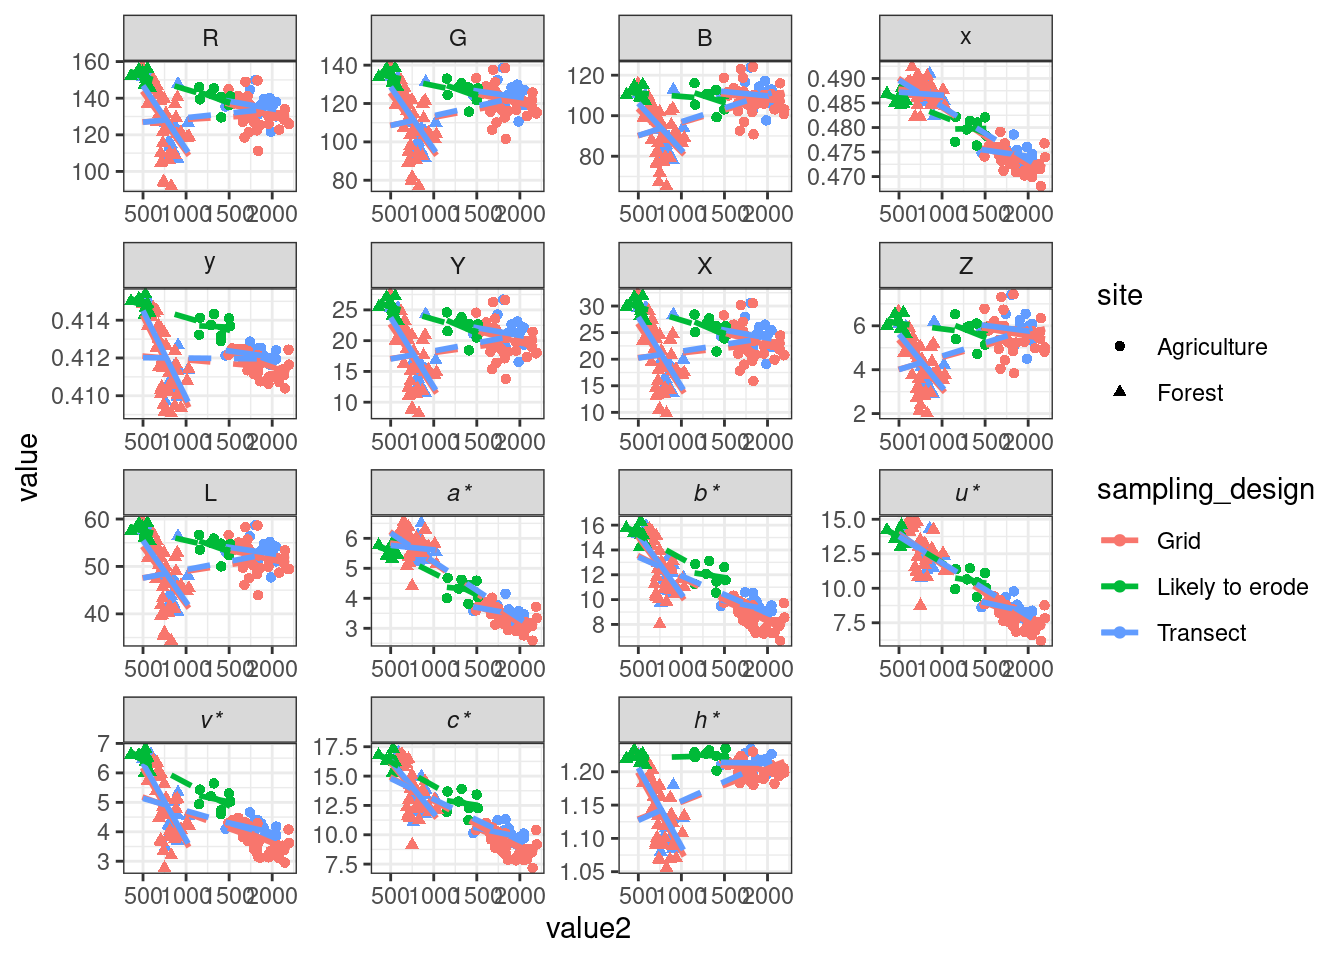

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

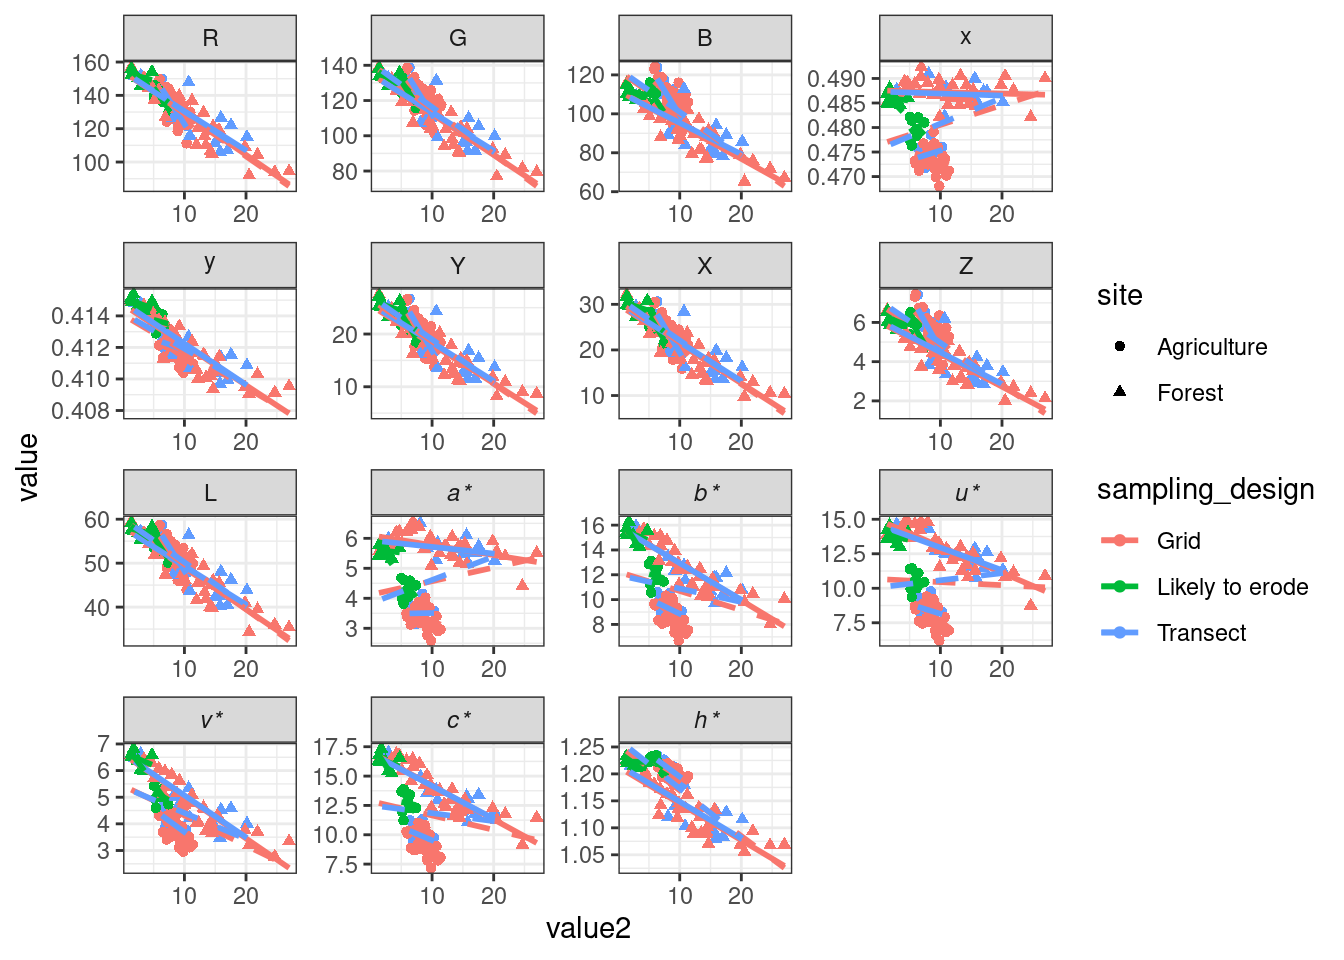

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

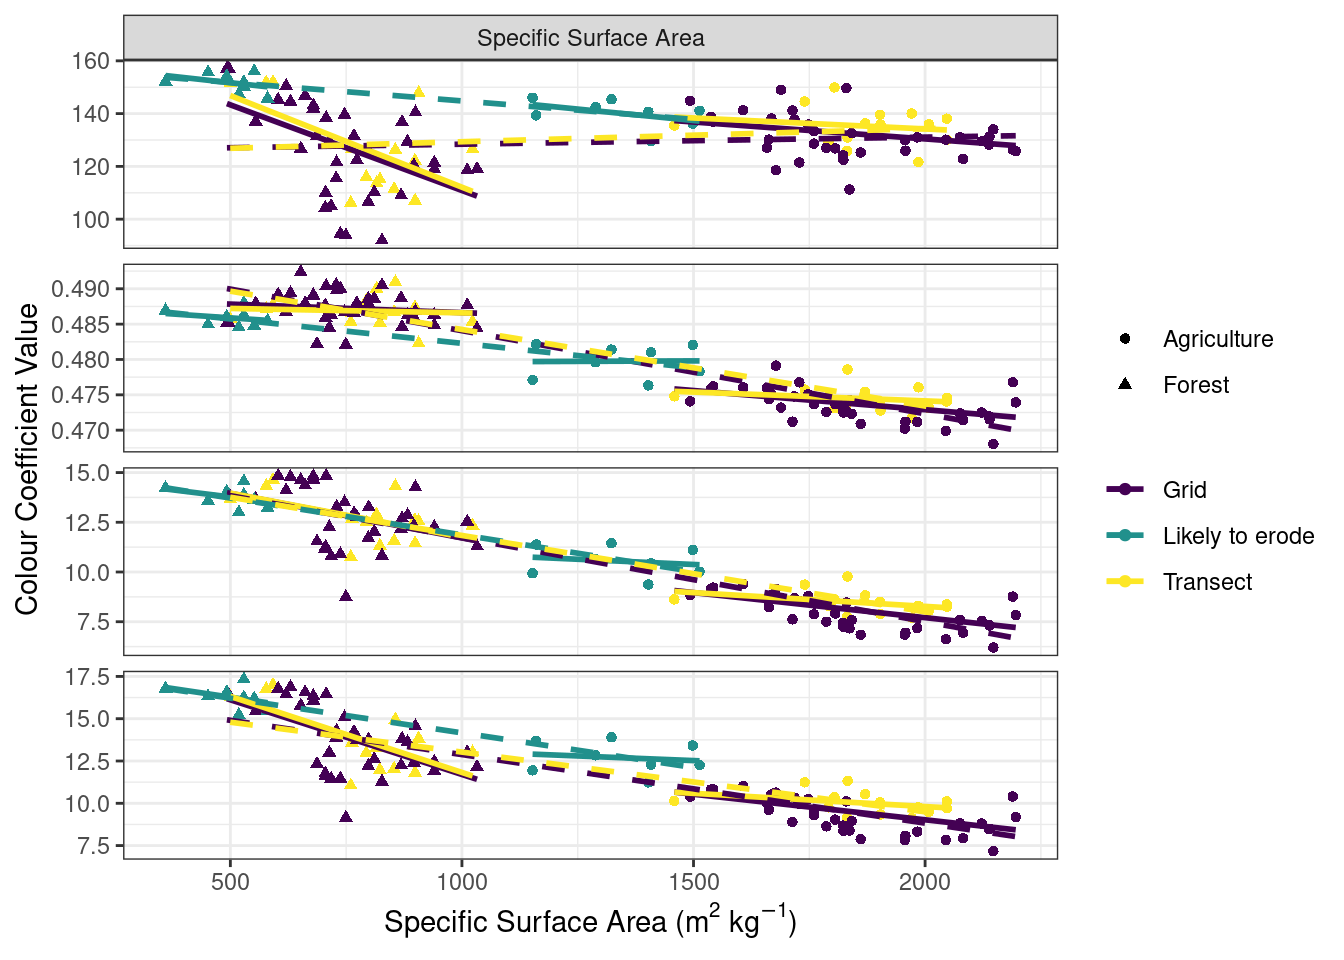

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

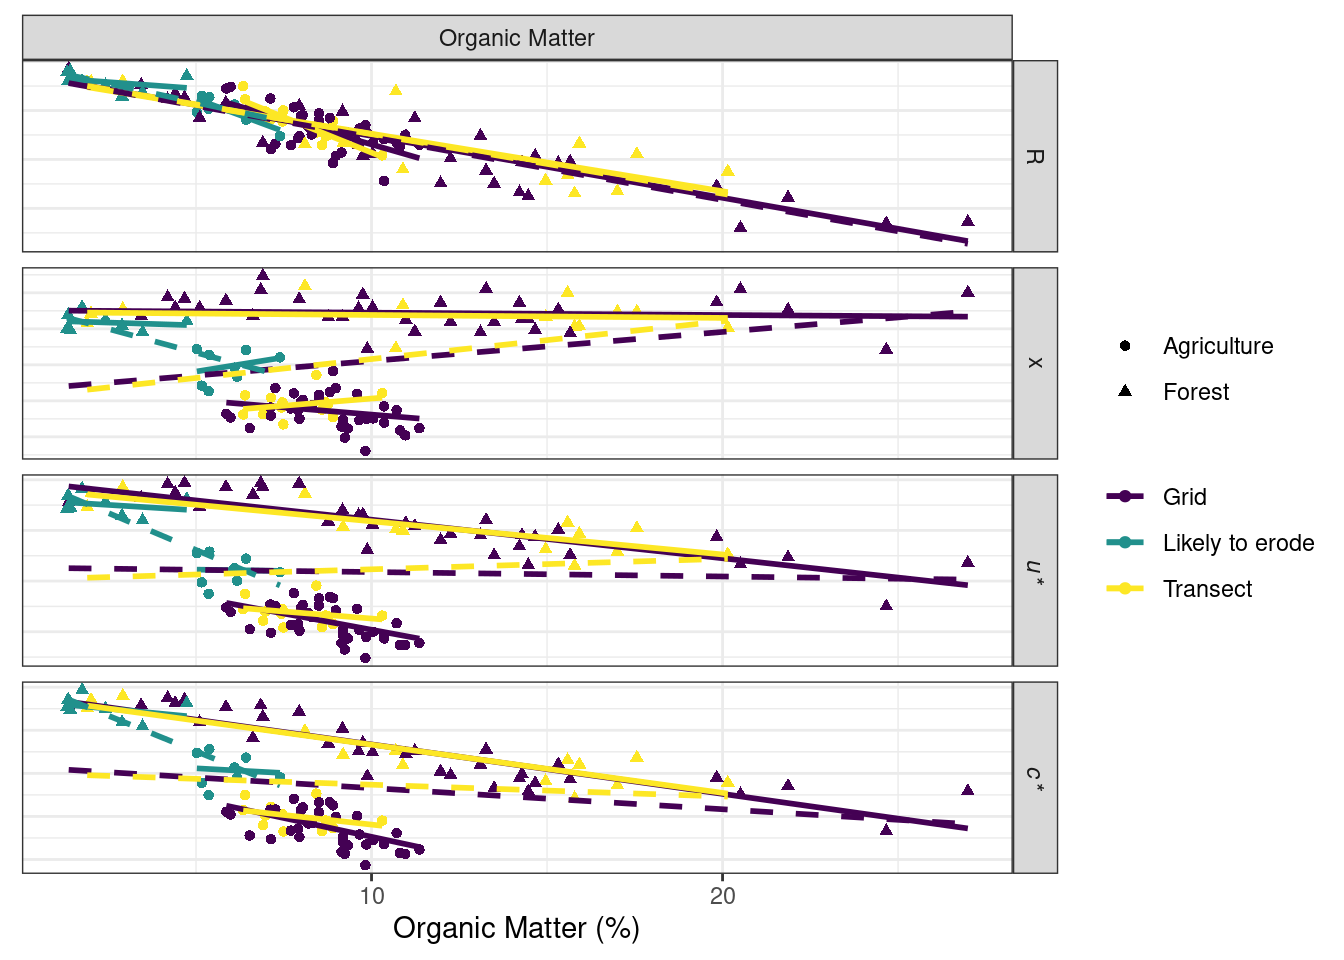

In [ ]:
example_fingerprint_col <- c("R", "x", "italic(`c*`)", "italic(`u*`)")

ggplot(data = filter(plot_colour_2, property == "specific_surface_area"), aes(x = value2, y = value, colour = sampling_design, shape = site)) +
  geom_point() +
  theme_bw() +
  stat_smooth(method = "lm", se = F) + 
  stat_smooth(aes(colour = sampling_design, shape = NULL), method = "lm", se = F, linetype="dashed") +
  facet_wrap(~Fingerprint, scales = "free", labeller = label_parsed)


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

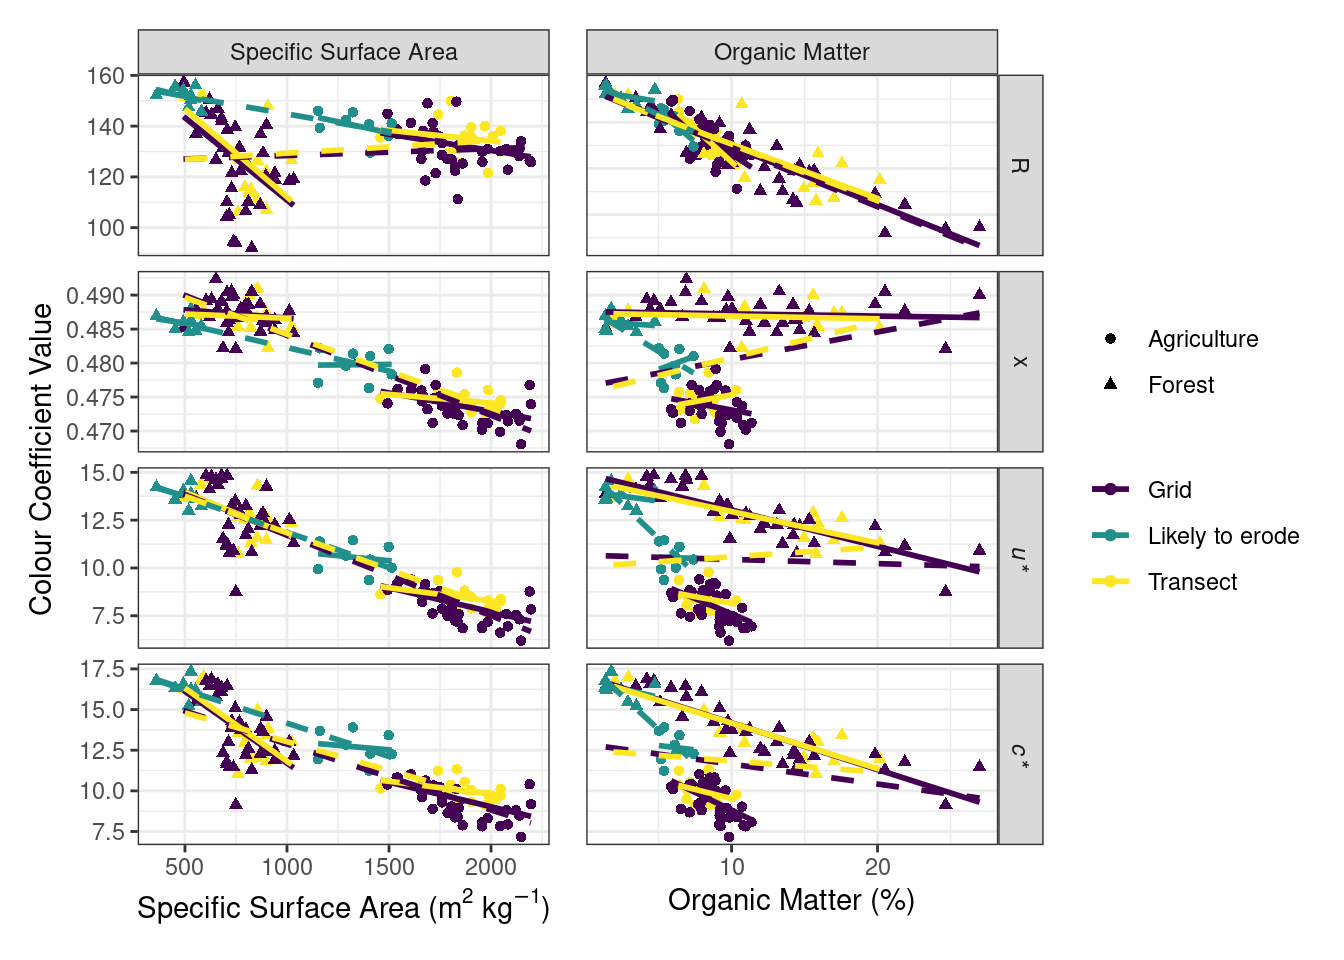

In [ ]:
p6 <- p_ssa_col + p_om_col +
  plot_layout(guides = 'collect')
p6


## Overall Summary

In [ ]:
summary <- corr_colour %>%
  bind_rows(corr_colour2, corr_geo, corr_geo2) %>%
  pivot_longer(cols = c(p_value_ssa, p_value_d50, p_value_om), names_to = "analysis", values_to = "pvalue") %>%
  filter(analysis != "p_value_d50") %>%
  group_by(site, analysis, type, sampling_design) %>%
  summarise(n = n(),
            significant = sum(pvalue < 0.05, na.rm = TRUE),
            per_sig = sum(pvalue < 0.05, na.rm = TRUE)/n()*100) %>%
  ungroup() %>%
  mutate(analysis = fct_recode(analysis, "Organic matter" = "p_value_om", "SSA" = "p_value_ssa")) %>%
  rename("Site" = "site", "Property" = "analysis", "No. fingerprints" = "n", "Fingerprint" = "type", "No. p < 0.05" = "significant", "% p<0.05" = "per_sig")


`summarise()` has grouped output by 'site', 'analysis', 'type'. You can
override using the `.groups` argument.

In [ ]:
suptab3 <- summary |>
  group_by(sampling_design) |>
  gt() |>
  fmt_number(columns = "% p<0.05", decimals = 1) |>
  tab_style(style =  cell_text(weight = "bold", align = "center"), locations =  cells_row_groups()) |>
  tab_style(style =  cell_text(weight = "bold", align = "left"), locations =  cells_column_labels()) |>
  tab_style(style =  cell_text(align = "left"), locations =  cells_body())
suptab3


Site 
 Property 
 Fingerprint 
 No. fingerprints 
 No. p < 0.05 
 % p<0.05 
 
 
 
 
 Grid 
 
 Agriculture 
 Organic matter 
 Colour 
 15 
 14 
 93.3 
 Agriculture 
 Organic matter 
 Geochemistry 
 44 
 14 
 31.8 
 Agriculture 
 SSA 
 Colour 
 15 
 8 
 53.3 
 Agriculture 
 SSA 
 Geochemistry 
 44 
 22 
 50.0 
 Combined 
 Organic matter 
 Colour 
 15 
 13 
 86.7 
 Combined 
 Organic matter 
 Geochemistry 
 44 
 30 
 68.2 
 Combined 
 SSA 
 Colour 
 15 
 13 
 86.7 
 Combined 
 SSA 
 Geochemistry 
 44 
 37 
 84.1 
 Forest 
 Organic matter 
 Colour 
 15 
 14 
 93.3 
 Forest 
 Organic matter 
 Geochemistry 
 44 
 34 
 77.3 
 Forest 
 SSA 
 Colour 
 15 
 13 
 86.7 
 Forest 
 SSA 
 Geochemistry 
 44 
 37 
 84.1 
 
 Likely to erode 
 
 Agriculture 
 Organic matter 
 Colour 
 15 
 7 
 46.7 
 Agriculture 
 Organic matter 
 Geochemistry 
 44 
 4 
 9.1 
 Agriculture 
 SSA 
 Colour 
 15 
 0 
 0.0 
 Agriculture 
 SSA 
 Geochemistry 
 44 
 7 
 15.9 
 Combined 
 Organic matter 
 Colour 
 15 
 13 
 86.7 
 Combined 
 Organic matter 
 Geochemistry 
 44 
 35 
 79.5 
 Combined 
 SSA 
 Colour 
 15 
 12 
 80.0 
 Combined 
 SSA 
 Geochemistry 
 44 
 36 
 81.8 
 Forest 
 Organic matter 
 Colour 
 15 
 0 
 0.0 
 Forest 
 Organic matter 
 Geochemistry 
 44 
 1 
 2.3 
 Forest 
 SSA 
 Colour 
 15 
 0 
 0.0 
 Forest 
 SSA 
 Geochemistry 
 44 
 6 
 13.6 
 
 Transect 
 
 Agriculture 
 Organic matter 
 Colour 
 15 
 9 
 60.0 
 Agriculture 
 Organic matter 
 Geochemistry 
 44 
 9 
 20.5 
 Agriculture 
 SSA 
 Colour 
 15 
 0 
 0.0 
 Agriculture 
 SSA 
 Geochemistry 
 44 
 3 
 6.8 
 Combined 
 Organic matter 
 Colour 
 15 
 11 
 73.3 
 Combined 
 Organic matter 
 Geochemistry 
 44 
 27 
 61.4 
 Combined 
 SSA 
 Colour 
 15 
 10 
 66.7 
 Combined 
 SSA 
 Geochemistry 
 44 
 32 
 72.7 
 Forest 
 Organic matter 
 Colour 
 15 
 13 
 86.7 
 Forest 
 Organic matter 
 Geochemistry 
 44 
 29 
 65.9 
 Forest 
 SSA 
 Colour 
 15 
 12 
 80.0 
 Forest 
 SSA 
 Geochemistry 
 44 
 32 
 72.7